<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_%D0%94%D0%97_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree
import graphviz

In [633]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [634]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [635]:
# df = df[['pclass', 'age', 'embarked', 'fare']]
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [636]:
df.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


# Завдання 1
Очистіть дані від викидів(лише `fare`), розділіть на тренувальну та тестову чатини

<Axes: >

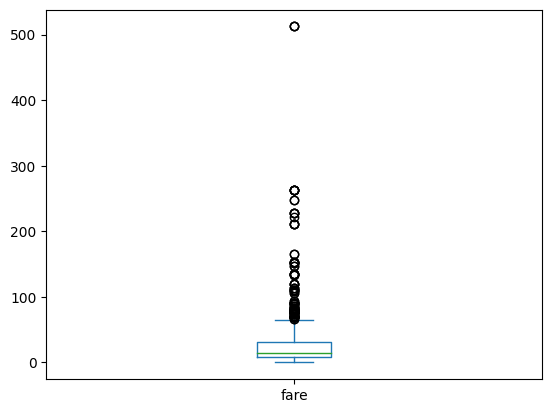

In [637]:
df['fare'].plot(kind='box')

In [638]:
df = df[df['fare'] < 500]

<Axes: >

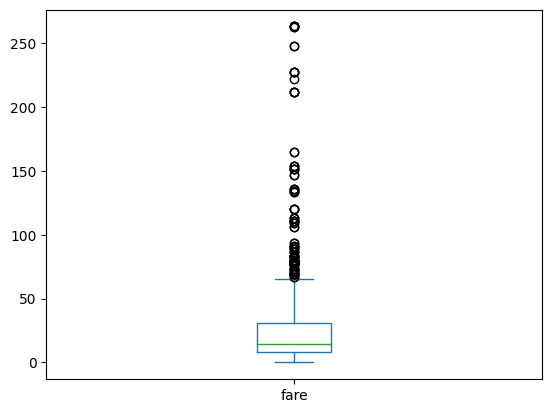

In [639]:
df['fare'].plot(kind='box')

In [640]:
y = df['fare']
X = df.drop(columns='fare')

In [641]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

# Завдання 2
Створіть Pipeline для обробки даних

In [642]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [643]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

# числові ознаки
# num_transformer = Pipeline(
#     steps=[("imputer", SimpleImputer(strategy="median"))]
#     )

num_transformer = Pipeline(
    steps=[("imputer", KNNImputer(n_neighbors=3))]
    )

# # категоріальні ознаки
# cat_transformer = Pipeline(
#     steps=[("imputer", SimpleImputer(strategy="most_frequent")),
#            ("encoder", OneHotEncoder(sparse_output=False,
#                                      handle_unknown='ignore'))])  # sparse_output для кращої візуалізації

cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=3
                                  ))])

# об'єднання двох pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

# для візуалізації вказуємо щоб результатом була таблиця
preprocessor.set_output(transform='pandas')
preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=3))]),
                                 Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=3))]),
                                 Index(['sex', 'embarked'], dtype='object'))])

# Завдання 3
Об'єднайте дерево рішень з препроцесором та натренуйте їх

In [644]:
model = Pipeline(
    [("prep", preprocessor),
     ("tree", tree.DecisionTreeRegressor(max_depth=6,
                                         min_samples_leaf=4,
                                         min_samples_split=6,
                                         random_state=42)
     )
    ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=3))]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=3))]),
                                                  Index(['sex', 'embarked'], dtype='object'))])),
                ('tree',
                 DecisionTreeRegressor(max_depth=6, min_samples_leaf=4,
                                       min_samples_split=6, random_state=42))])

In [645]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=3))]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=3))]),
                                                  Index(['sex', 'embarked'], dtype='object'))])),
                ('tree',
                 DecisionTreeRegressor(max_depth=6, min_samples_leaf=4,
                                       min_samples_split=6, random_state=42))])

In [646]:
model['prep'].set_output(transform='pandas')
model['prep'].transform(X_train)

,num__pclass,num__age,num__sibsp,num__parch,cat__sex,cat__embarked
709,3.0,15.666667,1.0,1.0,1.0,0.0
239,2.0,33.000000,0.0,0.0,1.0,2.0
382,3.0,32.000000,0.0,0.0,1.0,2.0
794,3.0,25.000000,0.0,0.0,1.0,2.0
684,2.0,60.000000,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...
106,3.0,21.000000,0.0,0.0,0.0,2.0
271,3.0,25.000000,0.0,0.0,1.0,2.0
863,3.0,11.333333,8.0,2.0,0.0,2.0
436,3.0,21.000000,2.0,2.0,0.0,2.0


# Завдання 4
Виведіть основні метрики моделі

In [647]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [648]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,8.94,10.67
RMSE,20.27,22.79
R2,0.77,0.63


# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

Попробуйте:
* не видаляти викиди
* змінити обробку даних(imputer(SimpleImputer vs KNNImputer) та кодування категоріальних даних(OneHotEncoder vs OrdinaryEncoder))
* змінити параметри дерева(глибина, кількість точок у листках тощо)

Text(0.5, 1.0, 'R2 vs tree depth')

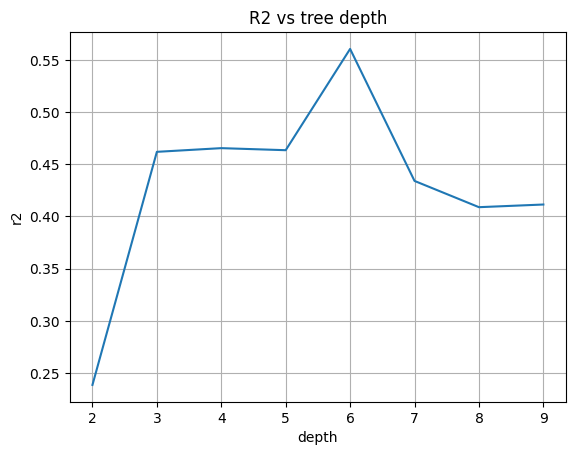

In [649]:
# якщо не видаляти викиди то
#R2: train = 0.82	test = -0.56

import matplotlib.pyplot as plt

r2 = []
depths = list(range(2, 10))

for depth in depths:
    model = Pipeline(
        [("prep", preprocessor),
        ("tree", tree.DecisionTreeRegressor(max_depth=depth,
                                            random_state=42)
        )
        ]
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2.append(metrics.r2_score(y_pred, y_test))


plt.plot(depths, r2)
plt.xlabel('depth')
plt.ylabel('r2')
plt.grid() # сітка
plt.title('R2 vs tree depth')



Text(0.5, 1.0, 'R2 vs tree leaf')

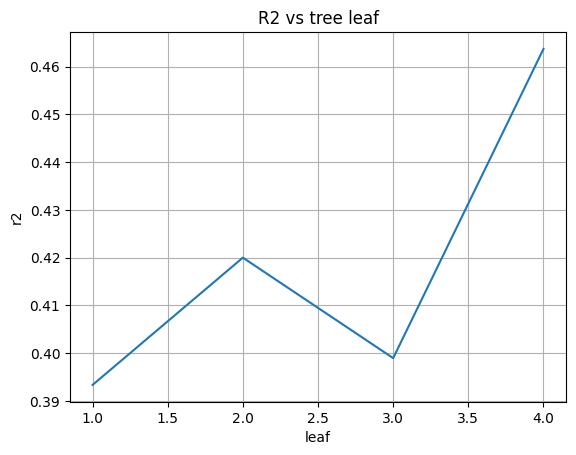

In [650]:
r2 = []
leafs = list(range(1, 5))

for leaf in leafs:
    model = Pipeline(
        [("prep", preprocessor),
        ("tree", tree.DecisionTreeRegressor(
                                            min_samples_leaf=leaf,
                                            # min_samples_split=5,
                                            random_state=42)
        )
        ]
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2.append(metrics.r2_score(y_pred, y_test))


plt.plot(leafs, r2)
plt.xlabel('leaf')
plt.ylabel('r2')
plt.grid() # сітка
plt.title('R2 vs tree leaf')

Text(0.5, 1.0, 'R2 vs tree split')

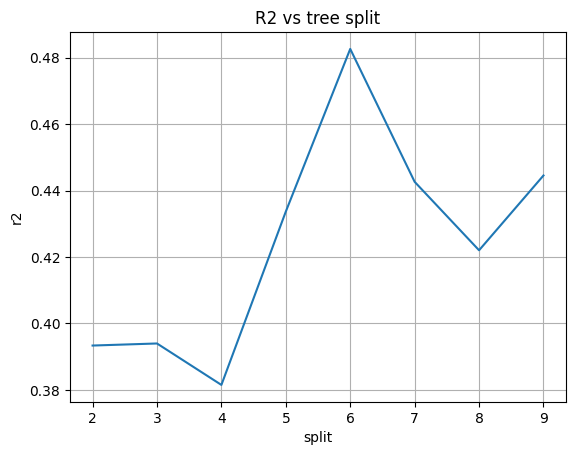

In [651]:
r2 = []
splits = list(range(2, 10))

for split in splits:
    model = Pipeline(
        [("prep", preprocessor),
        ("tree", tree.DecisionTreeRegressor(
                                            min_samples_split=split,
                                            random_state=42)
        )
        ]
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2.append(metrics.r2_score(y_pred, y_test))


plt.plot(splits, r2)
plt.xlabel('split')
plt.ylabel('r2')
plt.grid() # сітка
plt.title('R2 vs tree split')

# Завдання 6
Збережіть модель

In [652]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [653]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=3))]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=3))]),
                                                  Index(['sex', 'embarked'], dtype='object'))])),
                ('tree',
                 DecisionTreeRegressor(min_samples_split=9, random_state=42))])